# Producing Tables and Plots

This notebook is designed to walk through the process of importing HDF
files with MODIS cloud profile and land cover data, reducing it to what
was visible and lit from the moon on the night of May 18, 2013, and
producing plots for publication, and ascii tables and lists of unique 
combinations for use in modeling the signal of an Earth-like exoplanet.
It uses functions from func.py, containing source code and documentation.

### Imports

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from astropy.io import ascii
from datetime import datetime
from mpl_toolkits.basemap import Basemap, solar
from matplotlib.colors import ListedColormap
from pyhdf.SD import SD, SDC 
from scipy import stats

from func import *   # local functions

### Vatiables and Functions

In [7]:
# Setting Up Variables

dat = datetime(2013,5,18,21,20,0)   # date of observation at time 21:20 UT

snowfile = '../MYD10C1_5.18.2013.hdf'    # Daily global snow cover, 0.05 x 0.05 degree average
snowsds_name = 'Day_CMG_Snow_Cover'

landfile = '../MCD12C1.2013.hdf'        # Yearly global land cover, 0.05 x 0.05 degree average
landsds_name = 'Majority_Land_Cover_Type_1'

cloudfile = '../MYD08_D3_5.18.13.hdf'   # Daily global cloud profile, 

cloud_sds = ['Cloud_Top_Pressure_Mean',                    # Use mean combined wavelength CTP 
             'Cloud_Optical_Thickness_16_Liquid_Mean']    # and mean 1.6 micron COT data

ctp_bins = [0.0000003, 0.025, 0.189, 0.213, 0.238, 0.268, 0.299, 0.332,    # bins for values of 
             0.372, 0.411, 0.554, 0.591, 0.628, 0.710, 0.902, 1.03]        # cloud top pressure

cot_bins = [0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,52,64,76,88,100]   # bins of cloud optical thickness values

cot_bins_crude = [0, 2, 5, 10, 15, 20, 25, 30, 35, 40, 52, 64, 76, 88, 100]   # cloud optical thickness bins
                                                                              # with fewer values between 0-20

In [9]:
# Using Local Functions

daynight = terminator(dat)    # create array of values for day/night terminator

land = landtypes(landfile, snowfile, landsds_name, snowsds_name, daynight)   # create land array

ctp, cot = ctp_cot(cloudfile, cloud_sds, ctp_bins, cot_bins, daynight)      # create ctp and cot arrays
ctp, cot_crude = ctp_cot(cloudfile, cloud_sds, ctp_bins, cot_bins_crude, daynight)

combos = unique_combos(land, cot, ctp)   # find unique combinations of land type, COT, and CTP


In [ ]:
# Creating ASCII Tables

ascii.write(ctp.T, 'ctp_moonview.txt')
ascii.write(cot.T, 'cot_moonview.txt')
ascii.write(land.T, 'land_moonview.txt')

### Plots

In [10]:
my_cmap = ListedColormap(['xkcd:black',
                       'xkcd:royal blue',
                       'xkcd:forest green',
                       'xkcd:green',
                       'xkcd:beige',
                       'xkcd:white'])

                Geostationary, Orthographic or Azimuthal equidistant basemap
                

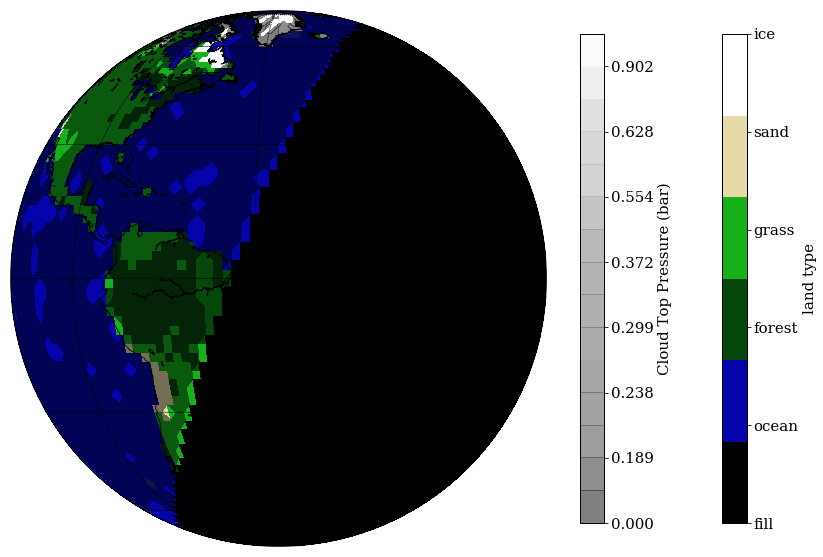

In [12]:
fig = plt.figure(figsize=(15,15))
    
plt.rc('font', family='serif', weight = 545, size = 15)

m = Basemap(projection='ortho', resolution='l', lat_0=0, lon_0 = -39.8333)

m.drawcoastlines(linewidth=0.8)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])

lat = np.arange(-90,89,2)
lon = np.arange(-180,180,2)

x, y = m(*np.meshgrid(lon, lat))

ax1 = m.pcolor(x, y, land[::-1], cmap=plt.cm.get_cmap(my_cmap,6))

plt.clim(0,5)

cbar = plt.colorbar(ax1, label='land type', orientation='vertical', ticks=range(6), shrink = 0.6)
cbar.outline.set_edgecolor('xkcd:black')
cbar.outline.set_linewidth(1)
cbar.ax.set_yticklabels(['fill', 'ocean', 'forest', 'grass', 'sand', 'ice'], {'fontsize':15})
cbar.outline.set_label({'fontsize':15})

ax2 = m.contourf(x, y, ctp[::-1], levels = ctp_bins, alpha = 0.5, cmap='Greys_r')

contour_bar = plt.colorbar(ax2, label = 'Cloud Top Pressure (bar)', orientation='vertical', shrink = 0.6)
contour_bar.outline.set_edgecolor('xkcd:black')
contour_bar.outline.set_linewidth(1)
#cax = contour_bar.ax
#contour_bar.ax.set_yticklabels(ctpbins, {'fontsize':15})

'''
cb_ax = contour_bar.ax
ax.text(1.3,0.5,r'$\tau$',rotation=90)
'''
#plt.title('2x2 Degree Land Cover of Earth as Seen from the Moon w/ Cloud Top Pressure - 5/18/13 21:20 UTC', {'fontsize':15})

#plt.savefig('landcover_ctp.pdf')
plt.show()

In [16]:
print cot

NameError: name 'cot' is not defined